In [7]:
import pandas as pd 

auto = pd.read_csv("./beginner_datasets/automobile.csv")

In [4]:
auto.sample()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
94,1,103.0,nissan,gas,std,four,wagon,fwd,front,94.5,...,97,2bbl,3.15,3.29,9.4,69,5200,31,37,7999


In [5]:
auto.shape

(202, 26)

In [12]:
auto.columns
#quando il df è molto grosso in n colonne posso provare il transpose (gira a 90 gradi)
auto.head(5).transpose()

,0,1,2,3,4
symboling,3,3,1,2,2
normalized-losses,NaN,NaN,NaN,164.0,164.0
make,alfa-romero,alfa-romero,alfa-romero,audi,audi
fuel-type,gas,gas,gas,gas,gas
aspiration,std,std,std,std,std
num-of-doors,two,two,two,four,four
body-style,convertible,convertible,hatchback,sedan,sedan
drive-wheels,rwd,rwd,rwd,fwd,4wd
engine-location,front,front,front,front,front
wheel-base,88.6,88.6,94.5,99.8,99.4


In [11]:
# ci sono nulli se si quanti?
auto.isna().sum()

symboling             0
normalized-losses    37
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  0
stroke                0
compression-ratio     0
horsepower            0
peak-rpm              0
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [18]:
# uso [] non il . perchè num-of-doors contiene trattini
# cerco auto che hanno num of doors nan
# cerco loc[:, "colonna"] perchè altrimenti cerca tra le righe 
door_na = auto.loc[:,"num-of-doors"].isna()
auto.loc[door_na].transpose()

,26,60
symboling,1,0
normalized-losses,148.0,NaN
make,dodge,mazda
fuel-type,gas,diesel
aspiration,turbo,std
num-of-doors,NaN,NaN
body-style,sedan,sedan
drive-wheels,fwd,fwd
engine-location,front,front
wheel-base,93.7,98.8


In [19]:
auto["num-of-doors"].unique()

array(['two', 'four', nan], dtype=object)

In [27]:
auto["doors"] = auto["num-of-doors"].replace("two", 2)

auto.doors.unique()

array([2, 'four', nan], dtype=object)

In [12]:
# creo colonna doors e sostituisco le str con int 
auto["doors"] = auto["num-of-doors"]
auto.doors = auto.doors.replace("four", 4)
auto.doors = auto.doors.replace("two", 2)
auto.doors.unique()

C:\Users\HOME\AppData\Local\Temp\ipykernel_17320\1744183283.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  auto.doors = auto.doors.replace("two", 2)


array([ 2.,  4., nan])

In [14]:
auto.sample(2).transpose()

,154,15
symboling,0,0
normalized-losses,91.0,NaN
make,toyota,bmw
fuel-type,diesel,gas
aspiration,std,std
num-of-doors,four,two
body-style,sedan,sedan
drive-wheels,fwd,rwd
engine-location,front,front
wheel-base,95.7,103.5


In [15]:
# inserire dati in num is door in base alle tue vlutazioni 
auto_group = auto.groupby(["make","body-style"])
auto_group["doors"].min()

make           body-style 
alfa-romero    convertible    2.0
               hatchback      2.0
audi           sedan          2.0
               wagon          4.0
bmw            sedan          2.0
chevrolet      hatchback      2.0
               sedan          4.0
dodge          hatchback      2.0
               sedan          4.0
               wagon          4.0
honda          hatchback      2.0
               sedan          2.0
               wagon          4.0
isuzu          hatchback      2.0
               sedan          4.0
jaguar         sedan          2.0
mazda          hatchback      2.0
               sedan          4.0
mercedes-benz  convertible    2.0
               hardtop        2.0
               sedan          4.0
               wagon          4.0
mercury        hatchback      2.0
mitsubishi     hatchback      2.0
               sedan          4.0
nissan         hardtop        2.0
               hatchback      2.0
               sedan          2.0
               wagon 

In [35]:
auto.head().transpose()

,0,1,2,3,4
symboling,3,3,1,2,2
normalized-losses,NaN,NaN,NaN,164.0,164.0
make,alfa-romero,alfa-romero,alfa-romero,audi,audi
fuel-type,gas,gas,gas,gas,gas
aspiration,std,std,std,std,std
num-of-doors,two,two,two,four,four
body-style,convertible,convertible,hatchback,sedan,sedan
drive-wheels,rwd,rwd,rwd,fwd,4wd
engine-location,front,front,front,front,front
wheel-base,88.6,88.6,94.5,99.8,99.4


In [20]:
# sostituisco i valori nan con il n porte appena trovate sopra
auto[door_na].fillna(4)

C:\Users\HOME\AppData\Local\Temp\ipykernel_17320\4283211736.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  auto[door_na].fillna(4)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,doors
26,1,148.0,dodge,gas,turbo,4,sedan,fwd,front,93.7,...,mpfi,3.03,3.39,7.6,102,5500,24,30,8558,4.0
60,0,4.0,mazda,diesel,std,4,sedan,fwd,front,98.8,...,idi,3.39,3.39,22.7,64,4650,36,42,10795,4.0


In [39]:
import numpy as np 
import pandas as pd 
temp = pd.DataFrame({"Giorno": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
  "Temperature": [18, 19, 18, np.nan, 21, 20, 20, np.nan, 21, 23, np.nan, 23, 24]})


In [41]:
temp.head(10)

,Giorno,Temperature
0,0,18.0
1,1,19.0
2,2,18.0
3,3,NaN
4,4,21.0
5,5,20.0
6,6,20.0
7,7,NaN
8,8,21.0
9,9,23.0


<Axes: >

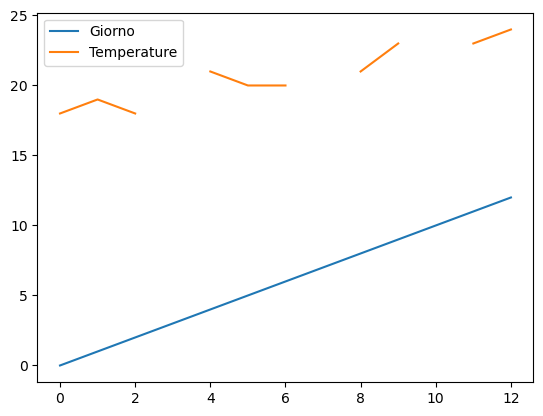

In [42]:
temp.plot()

In [44]:
temp.Temperature.fillna(temp.Temperature.mean())

#interpolate aggiunge dati tra il val prece e il val successivo 
# bfill aggiunge il val mancante con il val successivo 

0     18.0
1     19.0
2     18.0
3     20.7
4     21.0
5     20.0
6     20.0
7     20.7
8     21.0
9     23.0
10    20.7
11    23.0
12    24.0
Name: Temperature, dtype: float64

In [46]:
temp_fill = temp.Temperature.interpolate()

<Axes: >

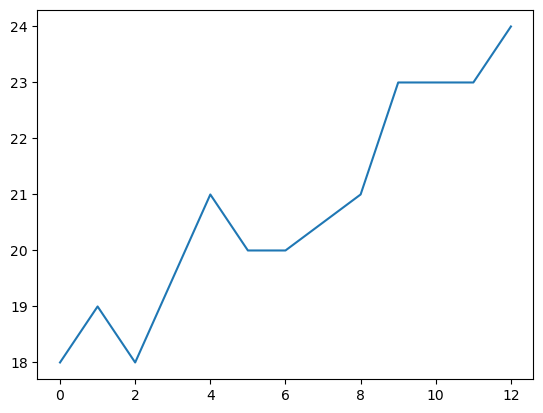

In [47]:
temp_fill.plot()